# Perfect Store Impact on Energy Drink Sales Volume in Convenience

### Excecutive Summary

##### Background

Perfect Store is a critical part of winning in Retail for any FMCG company. In the US the stores are very competitive with all brands fighting over shelf space, cooler placements, cold-cash, strike zone, brand messaging etc.

Most largFMCG companiesrs perform yearly audits and collect a range of perfect store data points, but to my knowledge, there has never been proven a true relationship between these and what actually drives sales. It appears to be very subjective what data points that actually has an impact, and not least what the impact is

For years I have challenged our data science team, business etc if there is a 'proven' relationship between this and sales volume, but I haven't received a straight answer.

This research will use both audit data and store sales data to investigate the impact.me.


##### Business Question

- Is there a relationship between perfect store and volume?
- What perfect store data points have a considerable impact?
- How much is the impact of each of these data points on volume?

These questions will be answered at the end of the paper.

##### Actionable Insights

This will afterwards give us an input to how we can change our focus out in the stores, and how we measure success, and what has actual impact on volume.

It will provide insight into:
- What volume increase, if any, will a $600 Chilled Placement Additional Cooler provide? How does it impact us if our Comp#1 does it?
- Does it pay off to increase service frequency.
- How much of an impact does brand and POS messaging have on volume? Is an extra investment in this worth it?

These insights will be provided at the end of the paper.


### Data Understanding and Limitations

Limited and masked extract of data: 
- I have for confidentiality reasons picked a limited geography and period for the audits. Internally it is a very interesting dataset that can be used for a very relevant usecase that I can't in this presentation.

Internal, not public, data used:
- Audit data
- Store sales data.

Other data of interest that wasn't included:
- It's not expected that the Perfect Store data will explain all of the volume but that a range of other data points may play in, that wont be included here. This is not considered an issue because just understanding the impact of the existing data points is of interest.
- Local activations, ours and competitors.
- Promotions
- Market share / demographic
- Displays (this couild be part of future audits)
- Brand messaging relevance (this could be part of future audits, e.g. does it match demographic in store).

### Expected Result

Traditionally the following five data points has been believed to have the largest impact on sales:

* Brand Messaging Score
* POS Communication Condition
* Shelf Space Condition
* Chilled Cashier Placement 
* SKU Distribution
* Actual Service Frequency

My personal belief is to keep an open mind, since I in the past 7 years have not been able to get a straight answer on how much these and other actually contribute to volume. 

### Data source, fields and definitions

Source: 
- Audit data from 392 convenience stores.

Key Factors:
-  30 store-related factors, including shelf space, cooler placement, brand messaging, and pricing visibility.


Snowflake Query from BI:
( *.12_1 internal query, not available for public access)
- filtered for certain period and geographic area to maintain confidentiality.
- filtered for convenience stores only.

Fields from data source:
* Core SKUs availability condition: Number of core SKUs in Store
* Brand Visibility Condition: Measure shows to what extent any kind of Brand Visibility (e.g. logo, rhombus, packshot image)  is placed with at least one placement of each placement type.  
* Brand Messaging Score: Measure shows to what extent any kind of Brand Messaging (e.g. Occasion, Functional, Consumer Activation)  is placed with at least one placement of each placement type. 
* Price Communication Condition Score: The extend to which price is communicated within the store for all SKU's listed.  
* Ambient Placement Additional: Additional placement beyond what is expected for store type.
* Chilled Placement Additional: Additional placement beyond what is expected for store type.
* Cashier Placement Cooler Condition: The extend it has met what is expected for store type.        
* Shelf Space Condition: The extend it has met what is expected for store type.           
* POS Communication Condition: The extend it has met what is expected for store type.               
* Available Placements Types In Store: How many different placement types are available in store.           
* Comp#1 Shelf Space: Length of shelf by Comp#1.          
* Shelf Space Share: Percentage category shelf space.       
* Chilled Cashier Placement: Placed at cashier                     
* Ambient Placement Additional: Additional placement beyond what is expected for store type.
* SKU Distribution: Number of SKUs           
* Actual Service Frequency

Fields calculated:
* Volume Single Pct: Volume for single serve (can) in percent of all volume.
* Volume 4pck Pct: Volume for 4 pack in percent of all volume.
* Volume 6pck Pct: Volume for 6 pack in percent of all volume.
* Volume 12pck Pct: Volume for 12 pack in percent of all volume.
* Volume_log: New target variable, log transformation of Volume.
  
Defintions: 
* Volume: Each unit is meausured in certain ounces, and in the industry it is typically used more frequently for reporting and analytics than dollars.

### Data Preparation

Import CSV file:

In [34]:
import pandas as pd

# Import raw csv file
energy_raw = pd.read_csv('data/energy.csv', delimiter=',')

Read file into preparation dataframe and show example of raw data:

Check for missing values:

In [35]:
# Copy into prep file and show a few examples:
energy_prep = energy_raw.copy()
# Show example of raw data
energy_prep.tail()

,Store,Core SKUs Availability,Shelf Space,Total Energy Drink Shelf Space,Comp#1 Shelf Space,Brand Visibility Condition,Brand Messaging Score,Price Comm Condition Score,Ambient Placement Condition Additional,Ambient Placements Additional,...,Distributor,Sales Gross,Sales Net,Actual Service Frequency,Volume 12pck,Volume 4pck,Volume 6pck,Volume Single,Volume,SKU Distribution
389,1011311731,100.0,6.0,16,6.0,100.0,33.3,100,100,1,...,5938,7825,7682,8,NaN,19.0,2.0,650,671,15
390,1011336023,93.3,6.0,17,3.5,66.7,33.3,100,100,1,...,5938,6283,6066,4,NaN,NaN,9.0,321,330,15
391,1011483780,100.0,7.0,17,5.0,50.0,25.0,100,100,1,...,5901,5037,4864,4,NaN,1.0,16.0,361,378,15
392,1014857573,93.3,5.5,16,6.0,50.0,0.0,100,100,2,...,5901,5768,5568,4,NaN,NaN,14.0,446,460,15
393,1015287602,100.0,7.0,17,6.0,100.0,100.0,100,100,1,...,5904,7626,7475,4,NaN,12.0,7.0,637,656,15


Check for NaN values

In [36]:
# Check for NaN values
energy_nan = energy_prep.isnull().sum()
energy_nan

Store                                       0
Core SKUs Availability                      0
Shelf Space                                 0
Total Energy Drink Shelf Space              0
Comp#1 Shelf Space                          0
Brand Visibility Condition                  0
Brand Messaging Score                       0
Price Comm Condition Score                  0
Ambient Placement Condition Additional      0
Ambient Placements Additional               0
Comp#1 Placement Ambient  Additional        0
Chilled Placement Additional                0
Comp#1 Placement Chilled  Additional        0
Cashier Placement Cooler Condition          0
Cashier Coolers With SKU Available          0
Cashier Coolers With Comp#1 Available       0
Shelf Space Condition                       0
POS Communication Condition                 0
Available Placements Types In Store         0
Energy Shelf Space Share                    0
Chilled Cashier Placement                   0
Main Competitor SKU               

Calculate new pack size (including single serve) percent values and ensure no NaN values

In [37]:
# Calculate new pack size percentage features. Fill with 0 in case of no value (NaN).
energy_prep['Volume 4pck'] = energy_prep['Volume 4pck'].fillna(0)
energy_prep['Volume 6pck'] = energy_prep['Volume 6pck'].fillna(0)
energy_prep['Volume 12pck'] = energy_prep['Volume 12pck'].fillna(0)
energy_prep['Volume 4pck Pct'] = (energy_prep['Volume 4pck'] / energy_prep['Volume'] * 100).round(2)
energy_prep['Volume 6pck Pct'] = (energy_prep['Volume 6pck'] / energy_prep['Volume'] * 100).round(2)
energy_prep['Volume 12pck Pct'] = (energy_prep['Volume 12pck'] / energy_prep['Volume'] * 100).round(2)
energy_prep['Sales Discount'] = ((energy_prep['Sales Gross'] - energy_prep['Sales Net']) / energy_prep['Sales Gross']) * 100
energy_prep = energy_prep.drop(columns=['Volume 4pck','Volume 6pck','Volume 12pck'])

Remove NaN:

In [38]:
# Remove 1 record with NaN values (Sales Discount)
energy_prep = energy_prep.dropna()

Remove fields not considered
- I have removed the features below for now because I want to zone in on Perfectd Store and see if that works without addtional dimensionality

In [39]:
# Drop store features not considered for this and show list of fields
energy_prep = energy_prep.drop(columns=['Store','Key Account','Distributor','Buying Group','Sales Gross','Sales Net'])
energy_prep

,Core SKUs Availability,Shelf Space,Total Energy Drink Shelf Space,Comp#1 Shelf Space,Brand Visibility Condition,Brand Messaging Score,Price Comm Condition Score,Ambient Placement Condition Additional,Ambient Placements Additional,Comp#1 Placement Ambient Additional,...,Main Competitor SKU,Ambient Placement Additional,Actual Service Frequency,Volume Single,Volume,SKU Distribution,Volume 4pck Pct,Volume 6pck Pct,Volume 12pck Pct,Sales Discount
0,73.3,3.0,6,1.0,0.0,0.0,0,0,0,0,...,5,0,2,74,74,14,0.00,0.00,0.0,2.224576
1,100.0,6.0,17,5.3,100.0,0.0,100,0,0,0,...,25,0,4,217,217,15,0.00,0.00,0.0,1.795540
2,93.3,7.0,23,5.8,50.0,50.0,0,0,0,0,...,26,0,2,164,165,14,0.61,0.00,0.0,4.719101
3,100.0,6.0,17,4.0,100.0,100.0,100,0,0,0,...,29,0,2,111,113,15,1.77,0.00,0.0,6.930693
4,93.3,6.0,17,5.5,0.0,0.0,100,0,0,0,...,22,0,3,116,116,15,0.00,0.00,0.0,1.918977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,100.0,6.0,16,6.0,100.0,33.3,100,100,1,0,...,30,1,8,650,671,15,2.83,0.30,0.0,1.827476
390,93.3,6.0,17,3.5,66.7,33.3,100,100,1,0,...,14,1,4,321,330,15,0.00,2.73,0.0,3.453764
391,100.0,7.0,17,5.0,50.0,25.0,100,100,1,0,...,30,1,4,361,378,15,0.26,4.23,0.0,3.434584
392,93.3,5.5,16,6.0,50.0,0.0,100,100,2,2,...,27,1,4,446,460,15,0.00,3.04,0.0,3.467406


### Data Exploration

#### Exploration of target variable

In [40]:
# Show Summary of target variable (before evaluated for transformation)
volume_summary = energy_prep['Volume'].describe()
volume_summary

count    393.000000
mean     192.567430
std      150.470999
min       24.000000
25%       87.000000
50%      142.000000
75%      244.000000
max      810.000000
Name: Volume, dtype: float64

Insight: 
- The "Volume" data is right-skewed, as indicated by the fact that the mean (192.57) is higher than the median (142).
There is a significant spread in the data, with the volume ranging from 24 to 810.

Show distribution in Histogram:

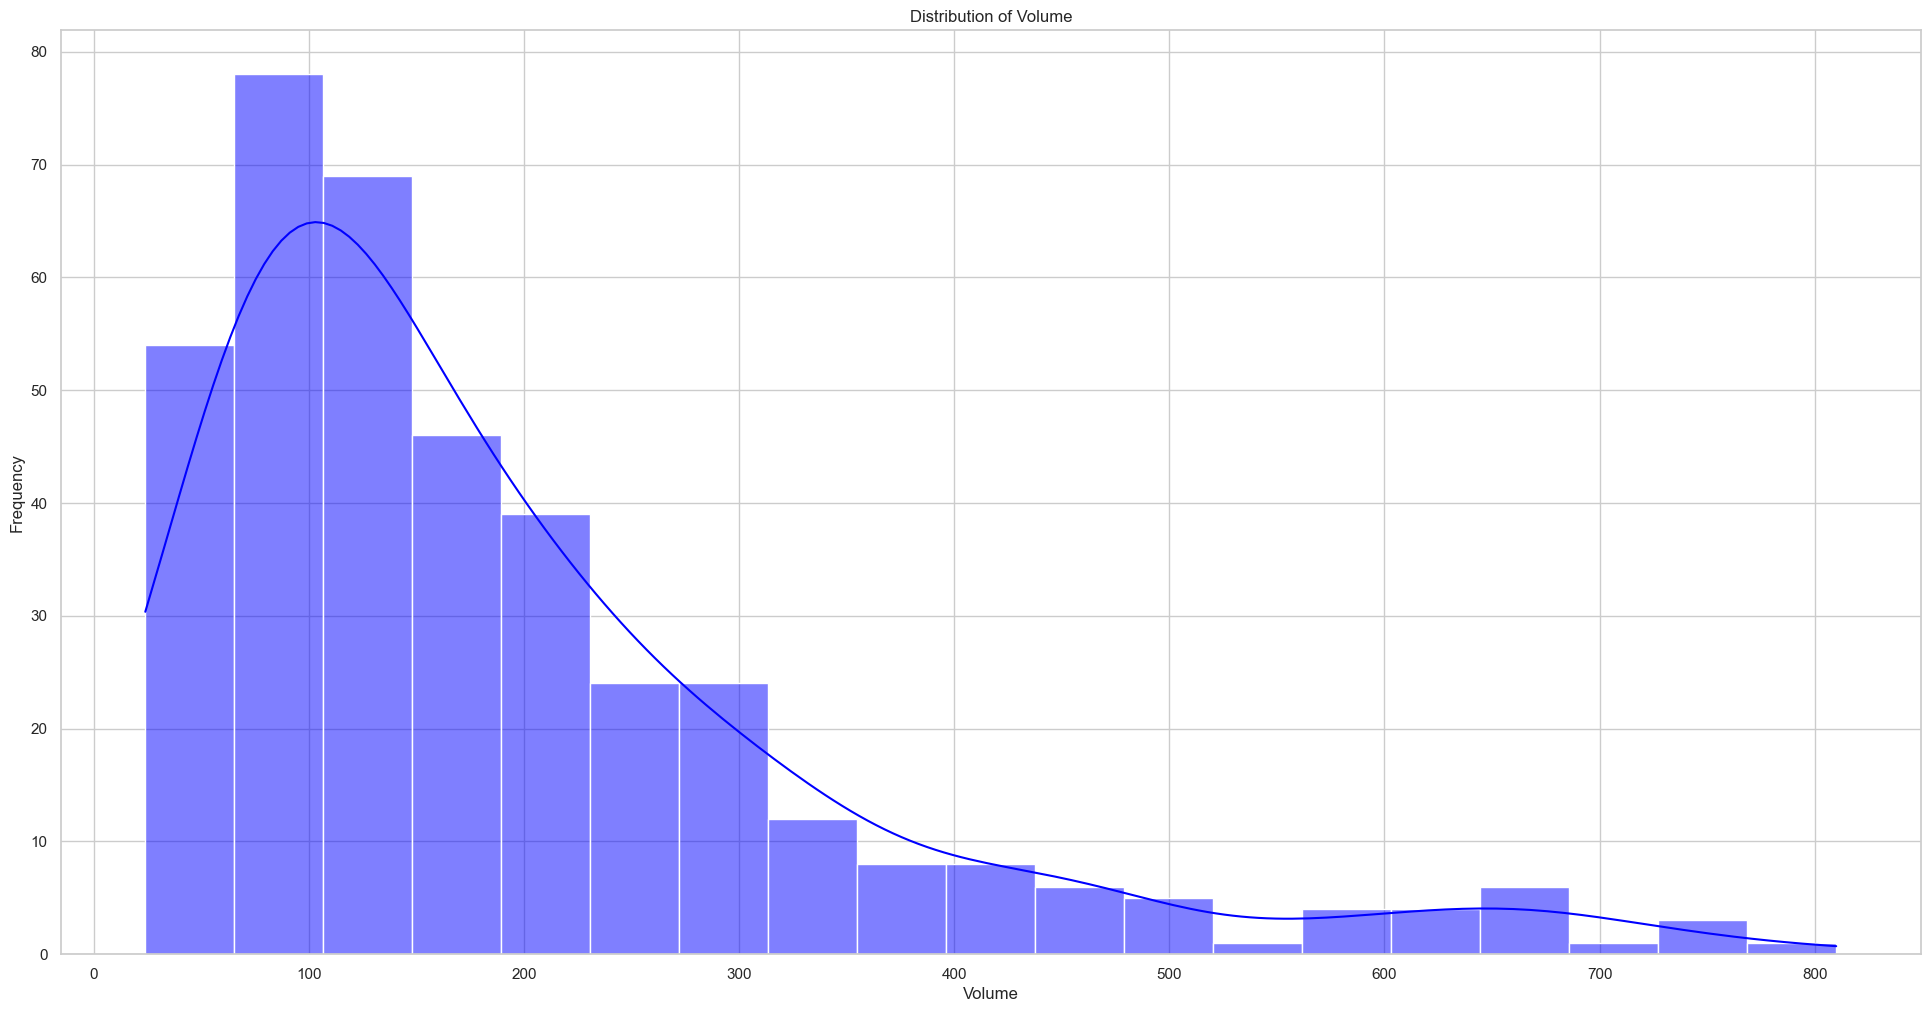

In [41]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Remove warning between python versions for histplot
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

# Plot the distribution in a histogram
sns.set(style="whitegrid")
plt.figure(figsize=(24, 12))
sns.histplot(energy_prep['Volume'], kde=True, color='blue')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

Insights:
* The distribution is heavily right-skewed, with most of the data points concentrated towards the lower end of the Volume range.
* Summary: The right-skewed distribution suggests that a log transformation, as shown in the previous analysis, is appropriate to normalize the data and make it more suitable for statistical analysis and modeling.

In [42]:
import numpy as np

# Log transformation of Volume getting new target variable Volume_log
energy_prep['Volume_log'] = np.log(energy_prep['Volume'] + 1)

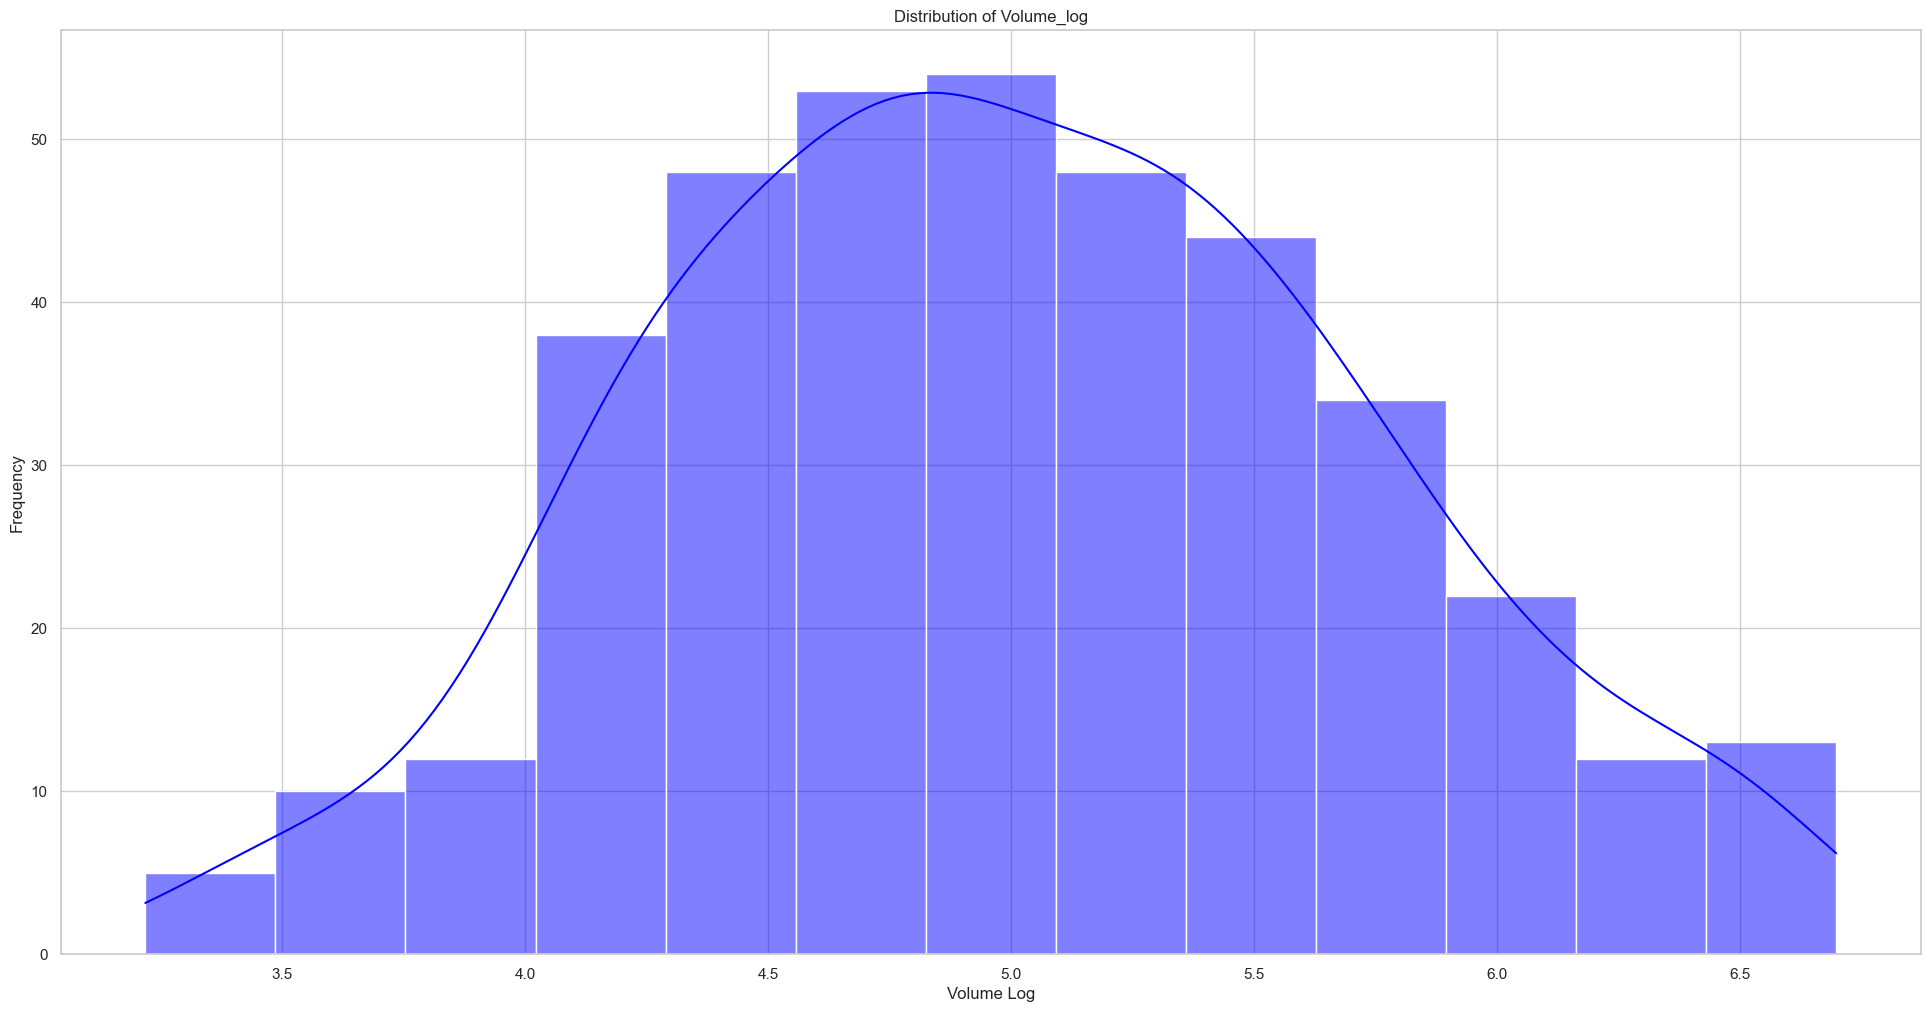

In [43]:
# Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(24, 12))
sns.histplot(energy_prep['Volume_log'], kde=True, color='blue')
plt.title('Distribution of Volume_log')
plt.xlabel('Volume Log')
plt.ylabel('Frequency')
plt.show()


Insight: 
* The Volume_log variable appears to be approximately normally distributed. This is beneficial for many statistical analyses and modeling techniques that assume normality.
* The peak of the distribution indicates the most frequent range of Volume_log values, which seems to be around 4.5 to 5.5.
* The spread of the data is fairly uniform on both sides of the center, with a slight tapering off towards the tails.
* Summary: The Volume_log variable shows an approximately normal distribution, indicating that the log transformation was successful in normalizing the data.

#### Exploration of features

##### Correlation: Heatmap

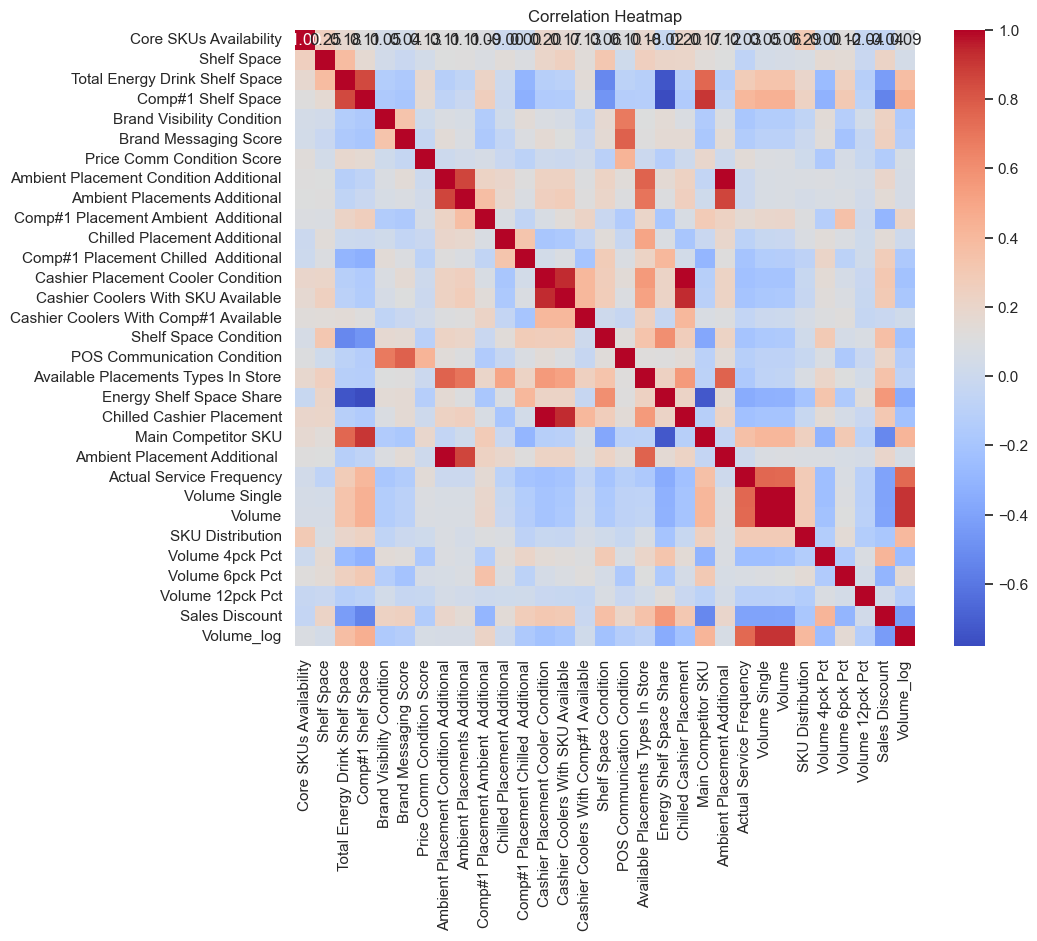

In [44]:
# Correlation of features shown in HeatMap
plt.figure(figsize=(10, 8))
sns.heatmap(energy_prep.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Insight:
* The correlation heatmap reveals strong relationships between volume metrics, shelf space, and placement conditions.
* The different volume metrics (4pck, 6pck, 12pck, Single) are all positively correlated with the overall volume, indicating that increases in these specific pack sizes contribute to the total volume.
* Shelf space and placement-related metrics (e.g., Total Energy Drink Shelf Space, Shelf Space Condition) show strong correlations with availability metrics (Core SKUs Availability).
* The negative correlation between Competitor #1 Shelf Space and the main competitor SKU suggests a competitive dynamic where increasing presence of one reduces the presence of the other.
* Summary: I will do a PCA that will help reduce dimensionality, identify patterns and deal with potential multi-collinarity.

Correlation for features:

In [45]:
# Correlation of features using corr()
energy_prep_corr = energy_prep.corr()['Volume'].sort_values(ascending=False)
energy_prep_corr

Volume                                    1.000000
Volume Single                             0.999304
Volume_log                                0.915923
Actual Service Frequency                  0.747185
Comp#1 Shelf Space                        0.437353
Main Competitor SKU                       0.412791
Total Energy Drink Shelf Space            0.334732
SKU Distribution                          0.290522
Comp#1 Placement Ambient  Additional      0.200089
Volume 6pck Pct                           0.106484
Ambient Placement Additional              0.094920
Price Comm Condition Score                0.089100
Ambient Placements Additional             0.080706
Ambient Placement Condition Additional    0.079360
Core SKUs Availability                    0.056570
Shelf Space                               0.055149
Cashier Coolers With Comp#1 Available     0.004796
Chilled Placement Additional             -0.016270
Available Placements Types In Store      -0.060663
POS Communication Condition    

Insight: Positive:
- Volume Single is our most selling so not surprising to see this correlation.
- Visit Frequency is also expected to be high.
- Surprising is Comp#1 Shelf Space and Main Competitor SKU.

Insight: Negative:
- Sales Discount, Volume 4pck and Chilled Cashier Placement stands out as surprising.

Insight: Weak:
- Shelf Space, Brand Messaging, POS Communication are surprising to have week correlatoin.

Summary: But this is an early simple view, and we will review these later.

##### Correlation: Highly correlated shown in scatterplots

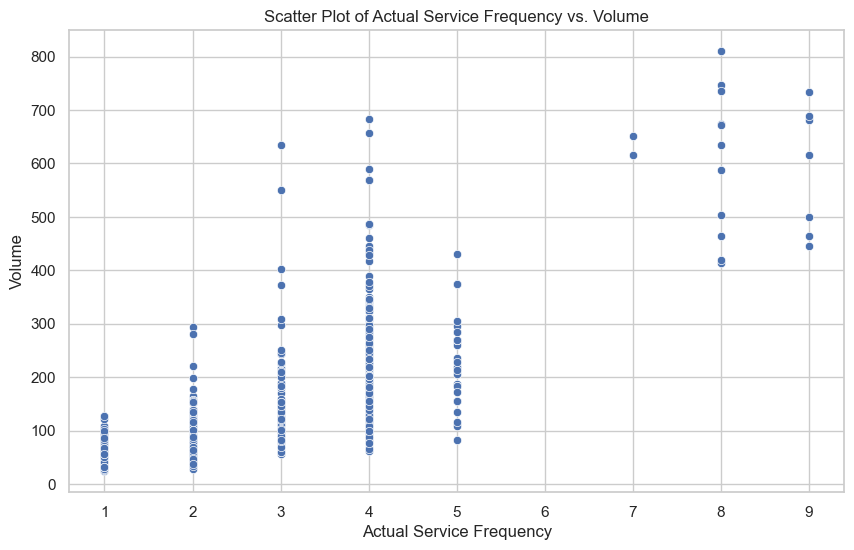

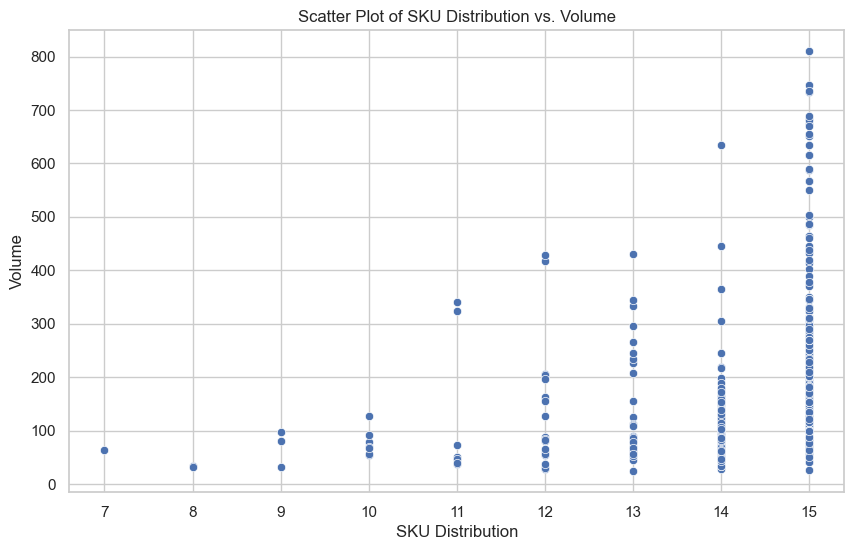

In [46]:
# Initial plot of features with high correlation > +0.1 that I consider more relevant: 
# - Actual Service Freqency
# - SKU Distribution

import seaborn as sns
import matplotlib.pyplot as plt

# Define the features to plot against Volume
features = [
    'Actual Service Frequency',
    'SKU Distribution'
]

# Plotting each feature against Volume
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=energy_prep[feature], y=energy_prep['Volume'])
    plt.title(f'Scatter Plot of {feature} vs. Volume')
    plt.xlabel(feature)
    plt.ylabel('Volume')
    plt.show()

Insights: Actual Service Frequency
* There is a positive correlation between actual service frequency and volume. Higher service frequencies tend to be associated with higher volumes.
* This trend is more pronounced at higher service frequencies, suggesting that more frequent servicing leads to increased sales volume.

Insights: SKU Distribution
* There is a clear positive correlation between SKU distribution and volume. As the number of SKUs increases, the volume tends to increase.
This trend is more pronounced at higher SKU distributions (13-15), where volumes are consistently higher.
* Increasing the number of SKUs available is associated with higher volumes, suggesting that expanding the product range can be beneficial for increasing sales.

##### PCA

Note:
- I considered multiple ways of reducing dimensionalty, multi-collinarity among others and I decided on PCA that gave me best results.
- VIF especially is good at detecting multi-collinarity but it included a lot of steps of removing, combining etc, and repeating the steps. PCA is more 'straigt forward'. 

##### PCA: Cummulative explained variance by component

Note: 
- Not using StandardScaler since all features are between 0 and 100. I tried it originally but it threw things off quite a bit.

In [47]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data into PCA dataframe
cols_pca = energy_prep.select_dtypes(include=[np.number]).columns
cols_pca = cols_pca.drop('Volume')
energy_prep_pca = energy_prep[cols_pca].fillna(energy_prep.mean())

# Separate features and target variable
features_pca = energy_prep_pca
target_pca = energy_prep_pca['Volume_log']

# Standardize the features
scaler = StandardScaler()
features_scaled_pca = scaler.fit_transform(features_pca)

# Perform PCA 
pca = PCA()
pca.fit(features_scaled_pca)

# Explained variance ratio and cumulative variance ratio sum
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Collect result in dataframe
pca_results = pd.DataFrame({
    'Component': np.arange(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_variance
})

# Result
print(pca_results.round(4))

    Component  Explained Variance Ratio  Cumulative Explained Variance
0           1                    0.2194                         0.2194
1           2                    0.1499                         0.3693
2           3                    0.0901                         0.4594
3           4                    0.0745                         0.5339
4           5                    0.0569                         0.5907
5           6                    0.0541                         0.6448
6           7                    0.0399                         0.6847
7           8                    0.0347                         0.7194
8           9                    0.0329                         0.7524
9          10                    0.0317                         0.7841
10         11                    0.0291                         0.8132
11         12                    0.0285                         0.8417
12         13                    0.0243                         0.8659
13    

Insight:
- ...

##### PCA: Identify Component for 90% treshould

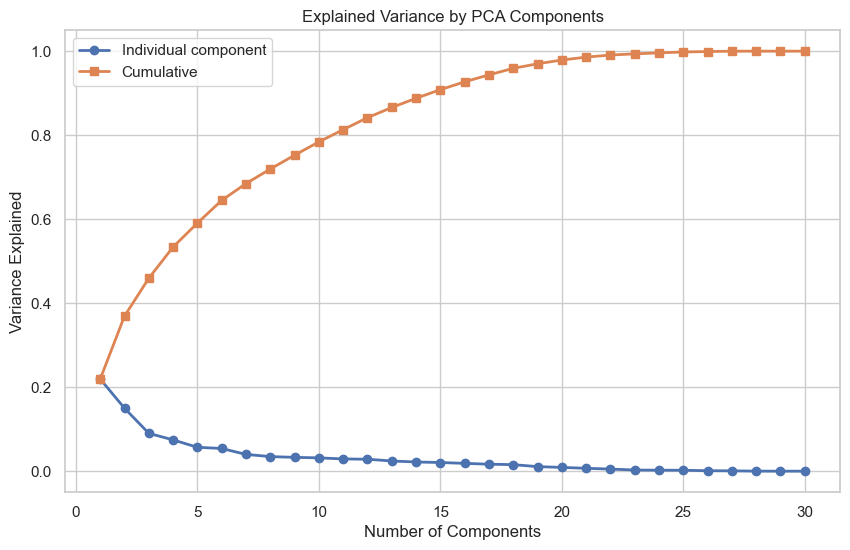

In [48]:
import matplotlib.pyplot as plt

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-', linewidth=2, label='Individual component')
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, 's-', linewidth=2, label='Cumulative')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Insight:
* The plot suggests that a small number of principal components can explain a large portion of the variance in the data.
Specifically, the first 10 components explain nearly all the variance, with diminishing returns for additional components.
* The first component explains around 20% of the variance, and the cumulative variance reaches about 80% by the 10th component.
Beyond the 10th component, additional components contribute very little to the overall variance, indicating that they might capture noise rather than useful signal
d.

##### PCA: Features and their loading for the chosen component

In [49]:
# Loadings from PCA
loadings = pca.components_

# Loadings for component 11 (index 10)
if loadings.shape[0] > 10:
    component_loadings = loadings[10]  

# Load to dataframe
component_features = pd.DataFrame({'Feature': cols_pca, 'Loading': component_loadings})

# Absolute value
component_features['Absolute Loading'] = component_features['Loading'].abs()
component_features = component_features.sort_values(by='Absolute Loading', ascending=False)

# Print the sorted features for component
print("Features and their loadings for Component 11:")
print(component_features)

Features and their loadings for Component 11:
                                   Feature   Loading  Absolute Loading
14   Cashier Coolers With Comp#1 Available  0.639247          0.639247
25                         Volume 4pck Pct  0.352634          0.352634
11    Comp#1 Placement Chilled  Additional -0.322630          0.322630
27                        Volume 12pck Pct -0.278774          0.278774
6               Price Comm Condition Score  0.254842          0.254842
9     Comp#1 Placement Ambient  Additional  0.235426          0.235426
10            Chilled Placement Additional  0.163473          0.163473
13      Cashier Coolers With SKU Available -0.156720          0.156720
19               Chilled Cashier Placement -0.147089          0.147089
12      Cashier Placement Cooler Condition -0.147089          0.147089
20                     Main Competitor SKU -0.131319          0.131319
16             POS Communication Condition  0.101206          0.101206
3                       Comp#1 

##### PCA: Features included for loading >= 0.02

In [50]:
import pandas as pd

# Access the loadings for PCA
loadings = pca.components_

# Ensure there are enough components
if loadings.shape[0] > 10:  # Checking if there are at least 11 components
    component_11_loadings = loadings[10]  # Get loadings for the 11th component (index 10)

    # Create a DataFrame mapping features to their loadings for Component 11
    component_11_features = pd.DataFrame({
        'Feature': cols_pca,
        'Loading': component_11_loadings
    })

    # Calculate the absolute values of loadings
    component_11_features['Absolute Loading'] = component_11_features['Loading'].abs()

    # Filter features where absolute loadings are greater than or equal to 0.05
    significant_features = component_11_features[component_11_features['Absolute Loading'] >= 0.02]['Feature'].tolist()

    # Add the target variable 'Volume_log' if it's not already in the list
    if 'Volume_log' not in significant_features:
        significant_features.append('Volume_log')

    # Create the final list of features to be used in further analysis or modeling
    features_pca = significant_features

    # Print the features to be used
    print("Features included in the PCA model:")
    print(features_pca)


Features included in the PCA model:
['Core SKUs Availability', 'Shelf Space', 'Total Energy Drink Shelf Space', 'Comp#1 Shelf Space', 'Brand Visibility Condition', 'Brand Messaging Score', 'Price Comm Condition Score', 'Ambient Placement Condition Additional', 'Comp#1 Placement Ambient  Additional', 'Chilled Placement Additional', 'Comp#1 Placement Chilled  Additional', 'Cashier Placement Cooler Condition', 'Cashier Coolers With SKU Available', 'Cashier Coolers With Comp#1 Available', 'Shelf Space Condition', 'POS Communication Condition', 'Energy Shelf Space Share', 'Chilled Cashier Placement', 'Main Competitor SKU', 'Ambient Placement Additional ', 'Volume Single', 'SKU Distribution', 'Volume 4pck Pct', 'Volume 12pck Pct', 'Sales Discount', 'Volume_log']


In [51]:
# Distince values in Feature
distinct_features = component_11_features['Feature'].unique().tolist()

# Remove if in features_pca
distinct_features = [feature for feature in distinct_features if feature not in features_pca]

# Print removed features
print("Features removed:\n", distinct_features)

Features removed:
 ['Ambient Placements Additional', 'Available Placements Types In Store', 'Actual Service Frequency', 'Volume 6pck Pct']


Insights:
- Surprising to see that thes placement data points and not least actual service frequency got removed. That was not expected.

## Modeling

Notes: A few decisions.

- Primarly use R2, MSE, RMSE to evaluate performance.RMSE is mostly used because it can be compared relatively between the models.
- Evaluate models doing test/split but also cross-validation. 
- Forecast using the existing actual data and compare the results between the models.
- Featurs have values between 0-10 and 0-100 so for PCA and regression I won't be scaling. I will do this though for Ridge and Lasso.
- For Ridge and Lasso I have experiemented with the lpha hyper-parameter.
e 


In [52]:
# moving data from preparation phase into modeling dataframe
energy = energy_prep[features_pca]

### Regression

#### Linear Regression

In [53]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 0 to 393
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Core SKUs Availability                  393 non-null    float64
 1   Shelf Space                             393 non-null    float64
 2   Total Energy Drink Shelf Space          393 non-null    int64  
 3   Comp#1 Shelf Space                      393 non-null    float64
 4   Brand Visibility Condition              393 non-null    float64
 5   Brand Messaging Score                   393 non-null    float64
 6   Price Comm Condition Score              393 non-null    int64  
 7   Ambient Placement Condition Additional  393 non-null    int64  
 8   Comp#1 Placement Ambient  Additional    393 non-null    int64  
 9   Chilled Placement Additional            393 non-null    int64  
 10  Comp#1 Placement Chilled  Additional    393 non-null    int64  
 11

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X_lr = energy.drop(columns=['Volume_log'])
y_lr = energy['Volume_log']

# Scaling: decided not to it because it gave me some numerical issues, and values are between 0-1 and 0-100.

# Split the data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

# Make predictions
y_train_pred_lr = lr_model.predict(X_train_lr)
y_test_pred_lr = lr_model.predict(X_test_lr)

# Evaluate the model
train_r2_lr = r2_score(y_train_lr, y_train_pred_lr)
test_r2_lr = r2_score(y_test_lr, y_test_pred_lr)
train_mse_lr = mean_squared_error(y_train_lr, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test_lr, y_test_pred_lr)
train_rmse_lr = np.sqrt(train_mse_lr)
test_rmse_lr = np.sqrt(test_mse_lr)

# Print evaluation metrics
print(f'Training R²: {train_r2_lr:.4f}')
print(f'Testing R²: {test_r2_lr:.4f}')
print(f'Training MSE: {train_mse_lr:.4f}')
print(f'Testing MSE: {test_mse_lr:.4f}')
print(f'Training RMSE: {train_rmse_lr:.4f}')
print(f'Testing RMSE: {test_rmse_lr:.4f}')

Training R²: 0.8677
Testing R²: 0.8947
Training MSE: 0.0679
Testing MSE: 0.0551
Training RMSE: 0.2605
Testing RMSE: 0.2346


Insight:
* The high R² values for both training and testing sets indicate that the model explains a large portion of the variance in the data, suggesting a good fit.
* The slightly higher R² and lower MSE/RMSE on the testing set compared to the training set suggest that the model generalizes well to new, unseen data.
* This indicates that the model is not overfitting and has captured the underlying patterns in the data effectively.


##### Cross-validation

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score

# Perform 10 fold cross-validation for MSE, RMSE, and R²
cv_mse_lr = -cross_val_score(lr_model, X_lr, y_lr, cv=10, scoring='neg_mean_squared_error')
cv_mse_mean_lr = np.mean(cv_mse_lr)
cv_rmse_lr = np.sqrt(cv_mse_lr)
cv_rmse_mean_lr = np.mean(cv_rmse_lr)
cv_r2_lr = cross_val_score(lr_model, X_lr, y_lr, cv=10, scoring='r2')
cv_r2_mean_lr = np.mean(cv_r2_lr)

# Print results
print('CV MSE:', [f'{mse:.4f}' for mse in cv_mse_lr])
print(f'Average CV MSE: {cv_mse_mean_lr:.4f}')
print('CV RMSE:', [f'{rmse:.4f}' for rmse in cv_rmse_lr])
print(f'Average CV RMSE: {cv_rmse_mean_lr:.4f}')
print('CV R²:', [f'{r2:.4f}' for r2 in cv_r2_lr])
print(f'Average CV R²: {cv_r2_mean_lr:.4f}')

CV MSE: ['0.0844', '0.0689', '0.0689', '0.1026', '0.0707', '0.0752', '0.0571', '0.0389', '0.1102', '0.2196']
Average CV MSE: 0.0896
CV RMSE: ['0.2906', '0.2625', '0.2624', '0.3203', '0.2659', '0.2743', '0.2389', '0.1971', '0.3320', '0.4686']
Average CV RMSE: 0.2913
CV R²: ['0.8282', '0.8010', '0.8070', '0.6684', '0.8186', '0.7936', '0.8675', '0.8619', '0.8454', '0.6331']
Average CV R²: 0.7925


Insight:
- One fold performs really poorly. It could be outliers, lack of ability to handle generalization.
- R2 values value from model is higher even than best folds which could suggest subsets of data, overfitting. I changed the folds and did get the same trend so it isn't that. 
- I will be exploring Ridge and Lasso, tuning hyperparameters using Grid Search.

### Ridge 

##### GridSearch - alpha

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid for Ridge regression
param_grid_ridge = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create a pipeline to standardize the data and apply Ridge regression
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Initialize GridSearchCV with Ridge regression and the parameter grid
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=10, scoring='r2')

# Separate features and target variable
X_ridge = energy.drop(columns=['Volume_log'])
y_ridge = energy['Volume_log']

# Fit the model
grid_search_ridge.fit(X_ridge, y_ridge)

# Best hyperparameters and corresponding R2 score
print(f'Best parameters for Ridge: {grid_search_ridge.best_params_}')
print(f'Best cross-validated R² for Ridge: {grid_search_ridge.best_score_:.4f}')


Best parameters for Ridge: {'ridge__alpha': 0.001}
Best cross-validated R² for Ridge: 0.7901


##### Split, Scale, Fit, Scores

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features and target variable
X_ridge = energy.drop('Volume_log', axis=1)
y_ridge = energy['Volume_log']

# Split the data into training and testing sets
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_ridge, y_ridge, test_size=0.2, random_state=42)

# Standardize the features after splitting
scaler = StandardScaler()
X_train_scaled_ridge = scaler.fit_transform(X_train_ridge)
X_test_scaled_ridge = scaler.transform(X_test_ridge)

# Fit the model with the scaled training data
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train_scaled_ridge, y_train_ridge)

# Make predictions
y_train_pred_ridge = ridge_model.predict(X_train_scaled_ridge)
y_test_pred_ridge = ridge_model.predict(X_test_scaled_ridge)

# Evaluate the model
train_mse_ridge = mean_squared_error(y_train_ridge, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test_ridge, y_test_pred_ridge)
train_rmse_ridge = mean_squared_error(y_train_ridge, y_train_pred_ridge,  squared=False)
test_rmse_ridge = mean_squared_error(y_test_ridge, y_test_pred_ridge, squared=False)
train_r2_ridge = r2_score(y_train_ridge, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test_ridge, y_test_pred_ridge)

# Print evaluation metrics
print(f'Training R²: {train_r2_ridge:.4f}')
print(f'Testing R²: {test_r2_ridge:.4f}')
print(f'Training MSE: {train_mse_ridge:.4f}')
print(f'Testing MSE: {test_mse_ridge:.4f}')
print(f'Training RMSE: {train_rmse_ridge:.4f}')
print(f'Testing RMSE: {test_rmse_ridge:.4f}')

Training R²: 0.8669
Testing R²: 0.8906
Training MSE: 0.0683
Testing MSE: 0.0572
Training RMSE: 0.2613
Testing RMSE: 0.2391


##### Cross-Validation:

In [26]:
from sklearn.model_selection import cross_val_score

# Note: Cross validation is run on entire data and not a split

# Separate features and target variable
X_ridge = energy.drop(columns=['Volume_log'])
y_ridge = energy['Volume_log']

# Standardize the features
scaler = StandardScaler()
X_scaled_ridge = scaler.fit_transform(X_ridge)

# Initialize the Ridge model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed

# 10-fold cross-validation for MSE
cv_mse_ridge = -cross_val_score(ridge_model, X_scaled_ridge, y_ridge, cv=10, scoring='neg_mean_squared_error')
cv_mse_mean_ridge = np.mean(cv_mse_ridge)
cv_rmse_ridge = np.sqrt(cv_mse_ridge)
cv_rmse_mean_ridge = np.mean(cv_rmse_ridge)
cv_r2_ridge = cross_val_score(ridge_model, X_scaled_ridge, y_ridge, cv=10, scoring='r2')
cv_r2_mean_ridge = np.mean(cv_r2_ridge)

# Display evaluation metrics
print('CV MSE:', [f'{mse:.4f}' for mse in cv_mse_ridge])
print(f'Average Cross-Validation MSE: {cv_mse_mean_ridge:.4f}')
print('CV RMSE:', [f'{rmse:.4f}' for rmse in cv_rmse_ridge])
print(f'Average Cross-Validation RMSE: {cv_rmse_mean_ridge:.4f}')
print('CV R²:', [f'{r2:.4f}' for r2 in cv_r2_ridge])
print(f'Average Cross-Validation R²: {cv_r2_mean_ridge:.4f}')

CV MSE: ['0.0864', '0.0739', '0.0661', '0.1084', '0.0719', '0.0804', '0.0549', '0.0396', '0.1055', '0.2175']
Average Cross-Validation MSE: 0.0905
CV RMSE: ['0.2939', '0.2719', '0.2570', '0.3293', '0.2681', '0.2836', '0.2343', '0.1990', '0.3249', '0.4663']
Average Cross-Validation RMSE: 0.2928
CV R²: ['0.8243', '0.7864', '0.8149', '0.6495', '0.8157', '0.7793', '0.8725', '0.8592', '0.8520', '0.6366']
Average Cross-Validation R²: 0.7890


### Lasso

##### Gridsearch - alpha

In [27]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Lasso regression
param_grid_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create a pipeline to standardize the data and apply Lasso regression
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=5000))
])

# Initialize GridSearchCV with Lasso regression and the parameter grid
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=10, scoring='r2')

# Separate features and target variable
X_lasso = energy.drop(columns=['Volume_log'])
y_lasso = energy['Volume_log']

# Fit the model
grid_search_lasso.fit(X_lasso, y_lasso)

# Best hyperparameters and corresponding R2 score
print(f'Best parameters for Lasso: {grid_search_lasso.best_params_}')
print(f'Best cross-validated R² for Lasso: {grid_search_lasso.best_score_:.4f}')

Best parameters for Lasso: {'lasso__alpha': 0.01}
Best cross-validated R² for Lasso: 0.7936


##### Split, Scale, Fit, Scores

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = energy.drop(columns=['Volume_log'])
y = energy['Volume_log']

# Split the data into training and testing sets
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features after splitting
scaler = StandardScaler()
X_train_scaled_lasso = scaler.fit_transform(X_train_lasso)
X_test_scaled_lasso = scaler.transform(X_test_lasso)

# Fit the Lasso model with the scaled training data
lasso_model = Lasso(alpha=0.01, max_iter=5000)
lasso_model.fit(X_train_scaled_lasso, y_train_lasso)

# Make predictions 
y_train_pred_lasso = lasso_model.predict(X_train_scaled_lasso)
y_test_pred_lasso = lasso_model.predict(X_test_scaled_lasso)

# Evaluate the model
train_mse_lasso = mean_squared_error(y_train_lasso, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test_lasso, y_test_pred_lasso)
train_rmse_lasso = mean_squared_error(y_train_lasso, y_train_pred_lasso, squared=False)
test_rmse_lasso = mean_squared_error(y_test_lasso, y_test_pred_lasso, squared=False)
train_r2_lasso = r2_score(y_train_lasso, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test_lasso, y_test_pred_lasso)


# Print evaluation metrics
print(f'Training R²: {train_r2_lasso:.4f}')
print(f'Testing R²: {test_r2_lasso:.4f}')
print(f'Training MSE: {train_mse_lasso:.4f}')
print(f'Testing MSE: {test_mse_lasso:.4f}')
print(f'Training RMSE: {train_rmse_lasso:.4f}')
print(f'Testing RMSE: {test_rmse_lasso:.4f}')

Training R²: 0.8603
Testing R²: 0.8947
Training MSE: 0.0717
Testing MSE: 0.0550
Training RMSE: 0.2677
Testing RMSE: 0.2346


##### Cross-validation

In [29]:
from sklearn.model_selection import cross_val_score

# Note: Cross validation is run on entire data and not a split

# Separate features and target variable
X_lasso = energy.drop(columns=['Volume_log'])
y_lasso = energy['Volume_log']

# Standardize the features
scaler = StandardScaler()
X_scaled_lasso = scaler.fit_transform(X_lasso)

# Initialize the model
lasso_model = Lasso(alpha=0.001)  # You can adjust the alpha parameter as needed

# 10-fold cross-validation for MSE
cv_mse_lasso = -cross_val_score(lasso_model, X_scaled_lasso, y_lasso, cv=10, scoring='neg_mean_squared_error')
cv_mse_mean_lasso = np.mean(cv_mse_lasso)
cv_rmse_lasso = np.sqrt(cv_mse_lasso)
cv_rmse_mean_lasso = np.mean(cv_rmse_lasso)
cv_r2_lasso = cross_val_score(lasso_model, X_scaled_lasso, y_lasso, cv=10, scoring='r2')
cv_r2_mean_lasso = np.mean(cv_r2_lasso)

# Display evaluation metrics
print('CV MSE:', [f'{mse:.4f}' for mse in cv_mse_lasso])
print(f'Average Cross-Validation MSE: {cv_mse_mean_lasso:.4f}')
print('CV RMSE:', [f'{rmse:.4f}' for rmse in cv_rmse_lasso])
print(f'Average Cross-Validation RMSE: {cv_rmse_mean_lasso:.4f}')
print('CV R²:', [f'{r2:.4f}' for r2 in cv_r2_lasso])
print(f'Average Cross-Validation R²: {cv_r2_mean_lasso:.4f}')

CV MSE: ['0.0859', '0.0749', '0.0659', '0.1074', '0.0699', '0.0813', '0.0546', '0.0401', '0.1047', '0.2240']
Average Cross-Validation MSE: 0.0909
CV RMSE: ['0.2931', '0.2737', '0.2568', '0.3277', '0.2644', '0.2852', '0.2337', '0.2002', '0.3236', '0.4733']
Average Cross-Validation RMSE: 0.2932
CV R²: ['0.8252', '0.7835', '0.8152', '0.6528', '0.8206', '0.7768', '0.8732', '0.8576', '0.8531', '0.6257']
Average Cross-Validation R²: 0.7884


Insights:
- Low alpha of 0.01 so less regularization is needed, and model is able to capture a lot of the noise.
- Low alpha means that there is more risk to overfitting (r2 and mse are used to evaluate this).

##### Compare Linear, Ridge and Lasso

In [30]:
# Create a dictionary with the results
from tabulate import tabulate
results = {
    'Model': ['Linear', 'Ridge', 'Lasso'],
    'Training R²': [train_r2_lr, train_r2_ridge, train_r2_lasso],
    'Testing R²': [test_r2_lr, test_r2_ridge, test_r2_lasso],
    'CV R²': [cv_r2_mean_lr, cv_r2_mean_ridge, cv_r2_mean_lasso],
    'Training MSE': [train_mse_lr, train_mse_ridge, train_mse_lasso],
    'Testing MSE': [test_mse_lr, test_mse_ridge, test_mse_lasso],
    'CV MSE': [cv_mse_mean_lr, cv_mse_mean_ridge, cv_mse_mean_lasso],
    'Training RMSE': [train_rmse_lr, train_rmse_ridge, train_rmse_lasso],
    'Testing RMSE': [test_rmse_lr, test_rmse_ridge, test_rmse_lasso],
    'CV RMSE': [cv_rmse_mean_lr, cv_rmse_mean_ridge, cv_rmse_mean_lasso]
}

# Create a DataFrame
df_results = pd.DataFrame(results).round(4)

#print(df_results)
print(tabulate(df_results, headers='keys', tablefmt='github', showindex=False))

| Model   |   Training R² |   Testing R² |   CV R² |   Training MSE |   Testing MSE |   CV MSE |   Training RMSE |   Testing RMSE |   CV RMSE |
|---------|---------------|--------------|---------|----------------|---------------|----------|-----------------|----------------|-----------|
| Linear  |        0.8677 |       0.8947 |  0.7925 |         0.0679 |        0.0551 |   0.0896 |          0.2605 |         0.2346 |    0.2913 |
| Ridge   |        0.8669 |       0.8906 |  0.789  |         0.0683 |        0.0572 |   0.0905 |          0.2613 |         0.2391 |    0.2928 |
| Lasso   |        0.8603 |       0.8947 |  0.7884 |         0.0717 |        0.055  |   0.0909 |          0.2677 |         0.2346 |    0.2932 |


Insights:
* Linear Regression has the highest CV R² (0.7925) and lowest CV RMSE (0.2913), indicating it generalizes well across different subsets of the data.
* Ridge Regression performs slightly worse than Linear Regression in terms of Testing RMSE and CV RMSE, but it is close. Lasso Regression, while performing equally well as Linear Regression on the test set, has a higher Training RMSE and CV RMSE, indicating it might not generalize as well.

#### Prediction of Model

##### Prediction of Linear, Ridge and Lasso visualized

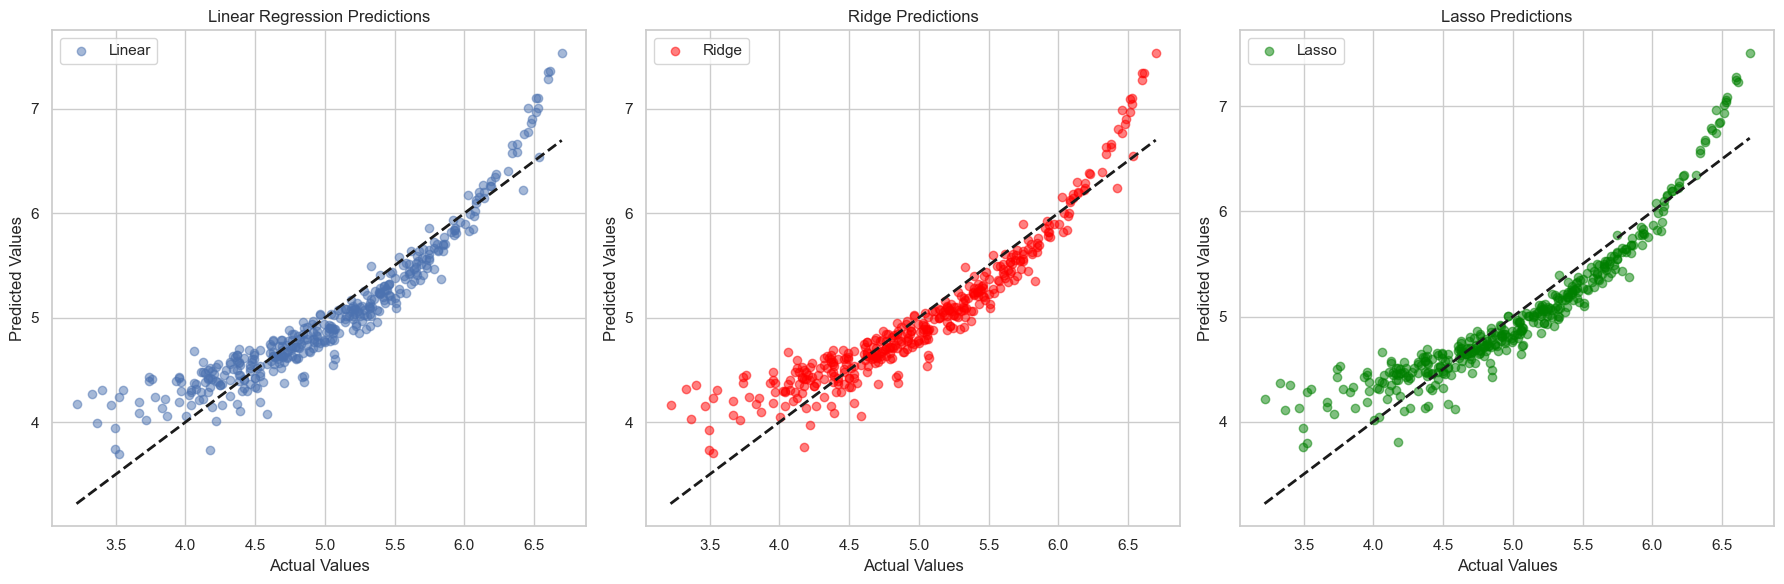

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Linear
actual_lr = pd.concat([y_train_lr, y_test_lr])
pred_lr = np.concatenate([y_train_pred_lr, y_test_pred_lr])

# Ridge
actual_ridge = pd.concat([y_train_lr, y_test_lr])
pred_ridge = np.concatenate([y_train_pred_ridge, y_test_pred_ridge])

# Lasso
actual_lasso = pd.concat([y_train_lasso, y_test_lasso])
pred_lasso = np.concatenate([y_train_pred_lasso, y_test_pred_lasso])

# Setting up the plot
plt.figure(figsize=(18, 6))

# Scatter plot for each model
plt.subplot(1, 3, 1)
plt.scatter(actual_lr, pred_lr, alpha=0.5, label='Linear')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) 
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(actual_ridge, pred_ridge, alpha=0.5, color='red', label='Ridge')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Ridge Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(actual_lasso, pred_lasso, alpha=0.5, color='green', label='Lasso')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  
plt.title('Lasso Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Layout adjustment
plt.tight_layout()
plt.show()


Insights:
* Linear Regression shows strong predictive performance with good alignment around the diagonal line, though it tends to underestimate slightly at higher values.
* Ridge Regression also shows strong performance, with even better alignment at higher values compared to Linear Regression, indicating improved handling of regularization.
* Lasso Regression displays a wider spread of predictions, indicating it might not be as precise as Linear and Ridge Regression. 

### Recommendation

Summary: Linear Regression is recommended.

Reasoning:

The recommendation for model selection depends on several factors including model performance metrics.

* Linear Regression: reasonably good performance with the given dataset without any regularization, suggesting that the model was able to fit the data without signs of significant overfitting.

* Ridge Regression showed a similar level of performance as Linear Regression, indicating that adding L2 regularization did not result in a loss of predictive power. This could provide a safeguard against potential overfitting if new data has different characteristics or if the dataset is expanded.

* Lasso Regression performed comparably to Ridge after alpha tuning and has the additional advantage of performing feature selection by potentially reducing some coefficients to zero. This could be beneficial if the goal is to simplify the model and identify the most impactful features.

* Cross-Validation results indicated that Ridge Regression had a slight edge over Linear Regression in terms of MSE, suggesting better generalization across different data subsets.
Hyperparameter Tuning identified an optimal alpha for Ridge that was quite high, suggesting the need for strong regularization, whereas Lasso required only a slight regularization, indicating a sparse feature set might be adequate.

Given these considerations, here is the recommendation:

If the interpretability of the model is crucial and the number of features is manageable, Linear Regression could be recommended for its simplicity and reasonable performance.

There is concern about potential overfitting due to future data possibly having different characteristics, Ridge Regression could be the safer choice because of its regularization which helps control model complexity.

If feature selection is important, for example in a high-dimensional dataset where understanding which features are most predictive is valuable, Lasso Regression would be the recommended model, especially since it showed comparable performance to Ridge.

Ultimately, the number of features won't change, like for other use cases, so Linear Regresson is the recommended model.

### Results

I already recommended the model but the following will have a less-technical aspect to it.

I will share the coefficients presented as the % impact on volume. I will answer the business questions and also consider the actionable insights that was raised in the beginning. I will finish off by commenting on my orginal expectations for highest positive impact data points.

##### Linear Regression Coefficents

Interpretation as % impact on volume:

In [32]:
# Display feature names and their corresponding coefficients
coefficients = lr_model.coef_
feature_names = X_lr.columns

# Convert to DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Calculate the exponentiated coefficients and the percentage change
coef_df['Exponentiated Coefficient'] = np.exp(coef_df['Coefficient'])
coef_df['Percentage Change (%)'] = (coef_df['Exponentiated Coefficient'] - 1) * 100

# Sort by absolute value of percentage change
coef_df['Abs_Percentage_Change'] = coef_df['Percentage Change (%)'].abs()
coef_df = coef_df.sort_values(by='Abs_Percentage_Change', ascending=False)

# Display the results
print(coef_df[['Feature', 'Coefficient', 'Percentage Change (%)']])


                                   Feature  Coefficient  Percentage Change (%)
19           Ambient Placement Additional     -1.269753             -71.909902
15             POS Communication Condition    -1.054669             -65.169233
4               Brand Visibility Condition     0.395392              48.496682
5                    Brand Messaging Score     0.395324              48.486547
6               Price Comm Condition Score     0.262991              30.081449
12      Cashier Coolers With SKU Available     0.100870              10.613278
21                        SKU Distribution     0.082490               8.598835
10    Comp#1 Placement Chilled  Additional    -0.069103              -6.676952
9             Chilled Placement Additional     0.046315               4.740419
8     Comp#1 Placement Ambient  Additional     0.044617               4.562715
23                        Volume 12pck Pct    -0.032232              -3.171771
3                       Comp#1 Shelf Space     0.015

##### Business Questions: 

Is there a relationship between perfect store and volume?
- Yes definitely.

What perfect store data points have a considerable impact?
- The highest positive impact ones are: Brand Visibility, Brand Messaging Score, Price Comm Condition Score, Cashier Coolers with SKU Available
    
How much is the impact of each of these data points on volume?
- There is considerable opportunity to make positive business cases for changing the focus on perfect store. Not only by increasing focus on positive ones, but also investigating or reducing the negative ones.


##### Actionable Insight:

Answering the questions listed in the beginning:

What volume increase, if any, will a $600 Chilled Placement Additional Cooler provide? How does it impact us if our Comp#1 does it?- Chilled Placement Additional will increase volume with +4.74%
- Comp#1 placing a Chilled Placement Additional will reduce our volume with -6.68%


Does it pay off to increase service frequenc?
- Service Frequency didn't have much impact and was removed as a feature..

How much of an impact does brand and POS messaging have on volume? Is an extra investment in this worth it
- Brand Visibility has huge impactd at 48.50% while e POS Communication Condition doesn and actually is -65.17%'t. It is surprising because it really asks the question how POS creatives and communication is perceived by the customer
  
What is the volume impact of adding a new SKU in the store?
- Adding a SKU (SKU Distribution) will increase Volume with +8.60%
?Summary: These results are really ground-breaking, and shold of course be tested further.s.

##### Review of Expected Results:

Here is a review of the expected features to have the largest positive impact on volume:

* Brand Messaging Score: Correct, very positive at +48.49%
* 
POS Communication Conditio: actually negative at -65.17%n
* 
Shelf Space Conditi: No really impact. Tiny negative impact of -0.55%o
* n
Chilled Cashier Placem: Smaller but okay impact at +4.74%e
* nt
SKU Distribu: Positive impact of +8.60%t
* ion
Actual Service Freq: Not even considered, had very little correlation with volume.uency

### Next Steps and Recommendations

##### Improvement of Research:

* Model Robustness: Try additional validation techniques to further assess the robustness of the models.

* External Validation: Validate the model with data from geographical areas and periods.

* Advanced Techniques: Explore advanced machine learning techniques for comparison with linear models, especially if the relationship between factors and volume is non-linear.

* Feature Interaction: Investigate potential interactions between features, as it may provide deeper insights into combined effects on volume.

##### Within the organization:

Changing the current Perfect Store approach would require a lot of change management so I suggest the following:

* Get a peer review of this research from our internal DS Team. This is a MUST due to the ground-breaking results.

* Document costs of Perfect Store activities and build cost/benefit analyis related to volume.

* Share results with SVP of Distribution.

* Discuss results with SVP of Trade Finance that manages/allocates Perfect Store spend.

* Get input from SVP of Marketing.

* Create a focus group with customers to test some of the results.

* Propose a test market for changed approach, and follow up with new audits and monitor changes in sales. Do it in parallel with another market that continues exising perfect store focus.

* Evaluate results, and if successful, get LT (CEO,CFO,CCO,CMO) alignment on next step for wider implementation.